 1. What was the change in price of the stock overtime?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetching data for each stock in the tech list
company_list = []
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for stock in tech_list:
    data = yf.download(stock, start, end)
    data['company_name'] = stock  # or use the names from company_name list if you prefer labels like "APPLE"
    company_list.append(data)

# Combine all the dataframes into a single dataframe with MultiIndex
df = pd.concat(company_list, keys=tech_list)

# Check the structure of the DataFrame
print("DataFrame Index Structure:", df.index.names)
print("Sample Data:", df.head(30))




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

DataFrame Index Structure: [None, 'Date']
Sample Data:                        Open        High         Low       Close   Adj Close  \
     Date                                                                     
AAPL 2023-08-28  180.089996  180.589996  178.550003  180.190002  179.272644   
     2023-08-29  179.699997  184.899994  179.500000  184.119995  183.182617   
     2023-08-30  184.940002  187.850006  184.740005  187.649994  186.694672   
     2023-08-31  187.839996  189.119995  187.479996  187.869995  186.913528   
     2023-09-01  189.490005  189.919998  188.279999  189.460007  188.495468   
     2023-09-05  188.279999  189.979996  187.610001  189.699997  188.734238   
     2023-09-06  188.399994  188.850006  181.470001  182.910004  181.978806   
     2023-09-07  175.179993  178.210007  173.539993  177.559998  176.656006   
     2023-09-08  178.350006  180.240005  177.789993  178.179993  177.272858   
     2023-09-11  180.070007  180.300003  177.339996  179.360001  178.446869 

Descriptive Statistics about the Data

In [2]:
# Access AAPL data correctly from a MultiIndexed DataFrame
try:
    aapl_data = df.xs('AAPL')  # Using cross-section (xs) to access data for 'AAPL'
    print(aapl_data.describe())
except KeyError as e:
    print("Error accessing data for AAPL:", e)

             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   189.818095  191.601508  188.232262  190.017460  189.483765   
std     17.906238   18.169205   17.539941   17.913677   18.072294   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.480003  177.442505  173.850002  175.677505  174.799145   
50%    186.594994  187.590004  184.485001  186.339996  185.879997   
75%    195.264999  196.697502  193.907501  194.917500  194.301895   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.520000e+02  
mean   5.996721e+07  
std    2.504361e+07  
min    2.404830e+07  
25%    4.606268e+07  
50%    5.364845e+07  
75%    6.595975e+07  
max    2.464214e+08  


Information About the Data

In [3]:
# General info
try:
    aapl_info = df.xs('AAPL')  # Ensure we're using the same method to access AAPL data
    aapl_info.info()
except KeyError as e:
    print("Error accessing general info for AAPL:", e)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-28 to 2024-08-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


Closing Price

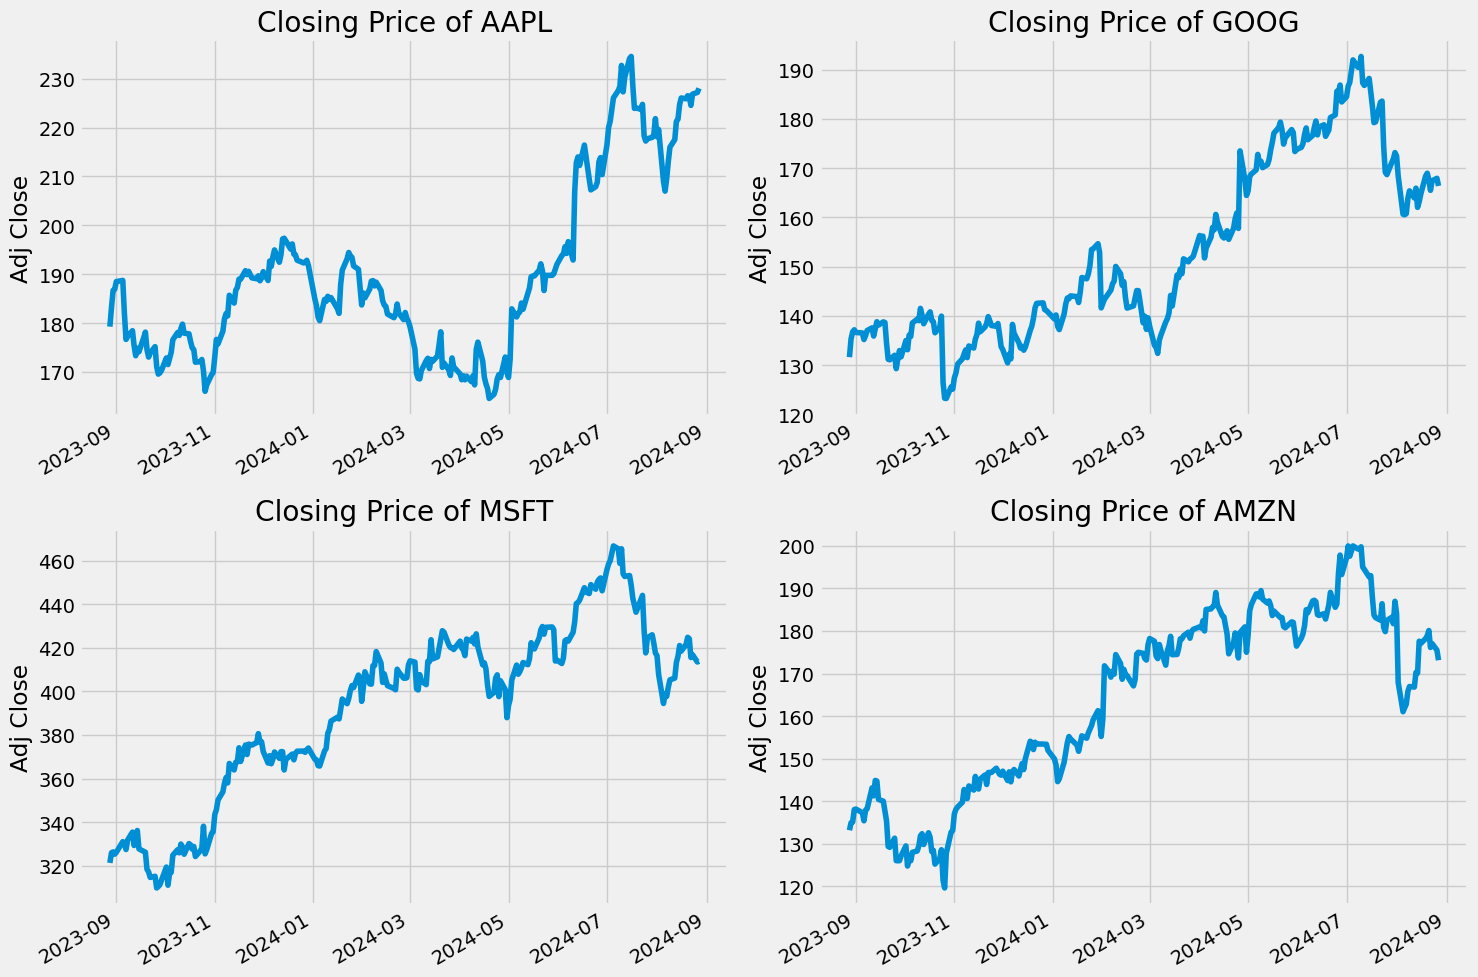

In [4]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


Volume of Sales

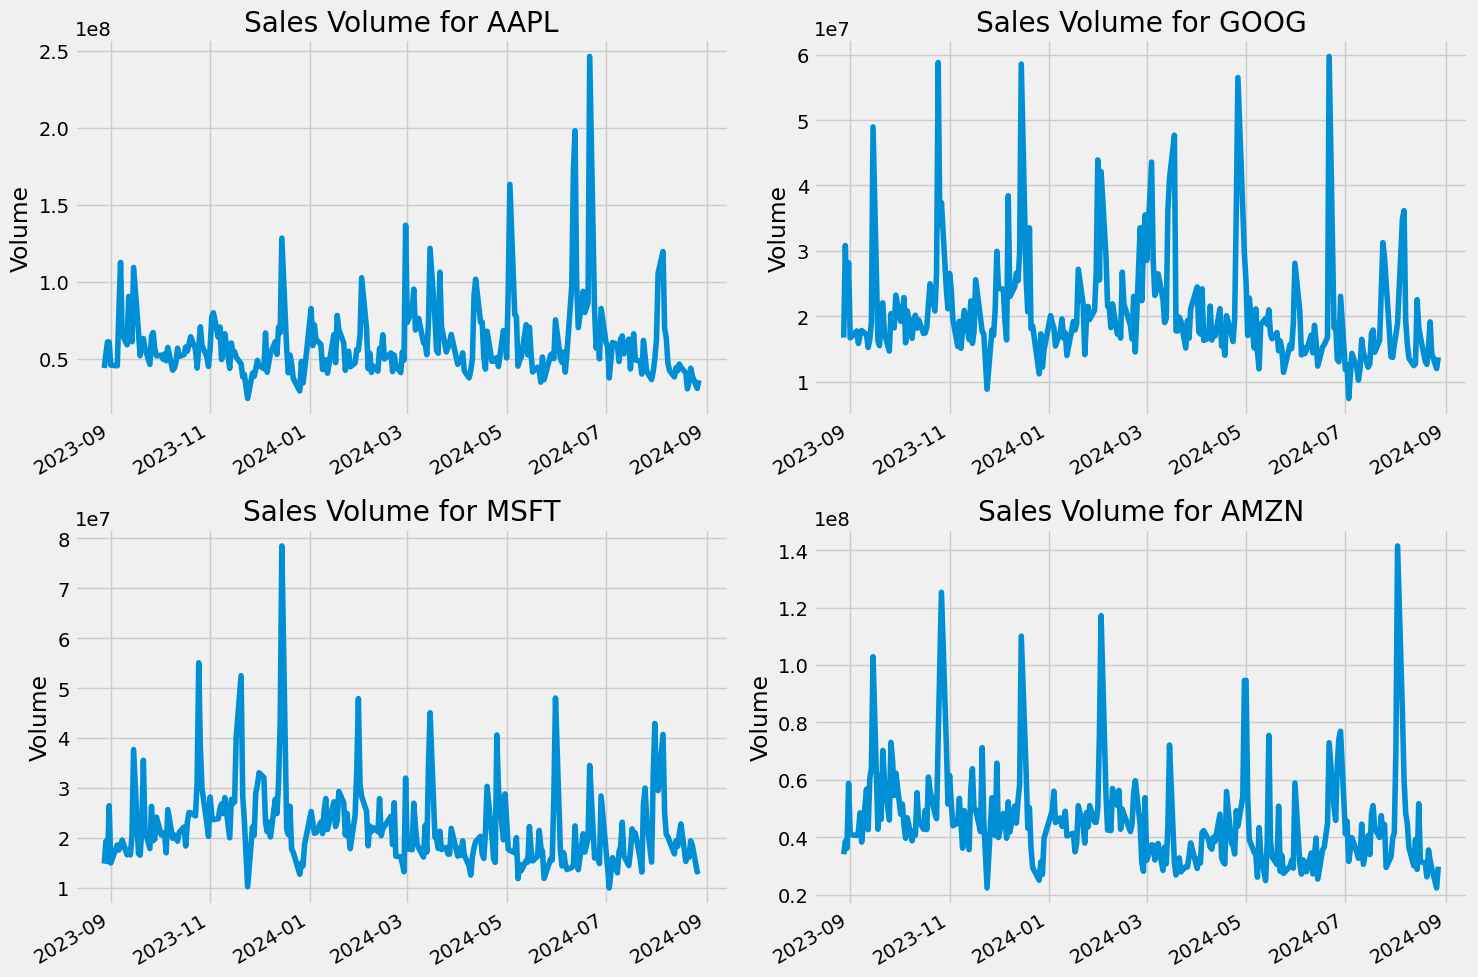

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

2.What was the moving average of the various stocks?

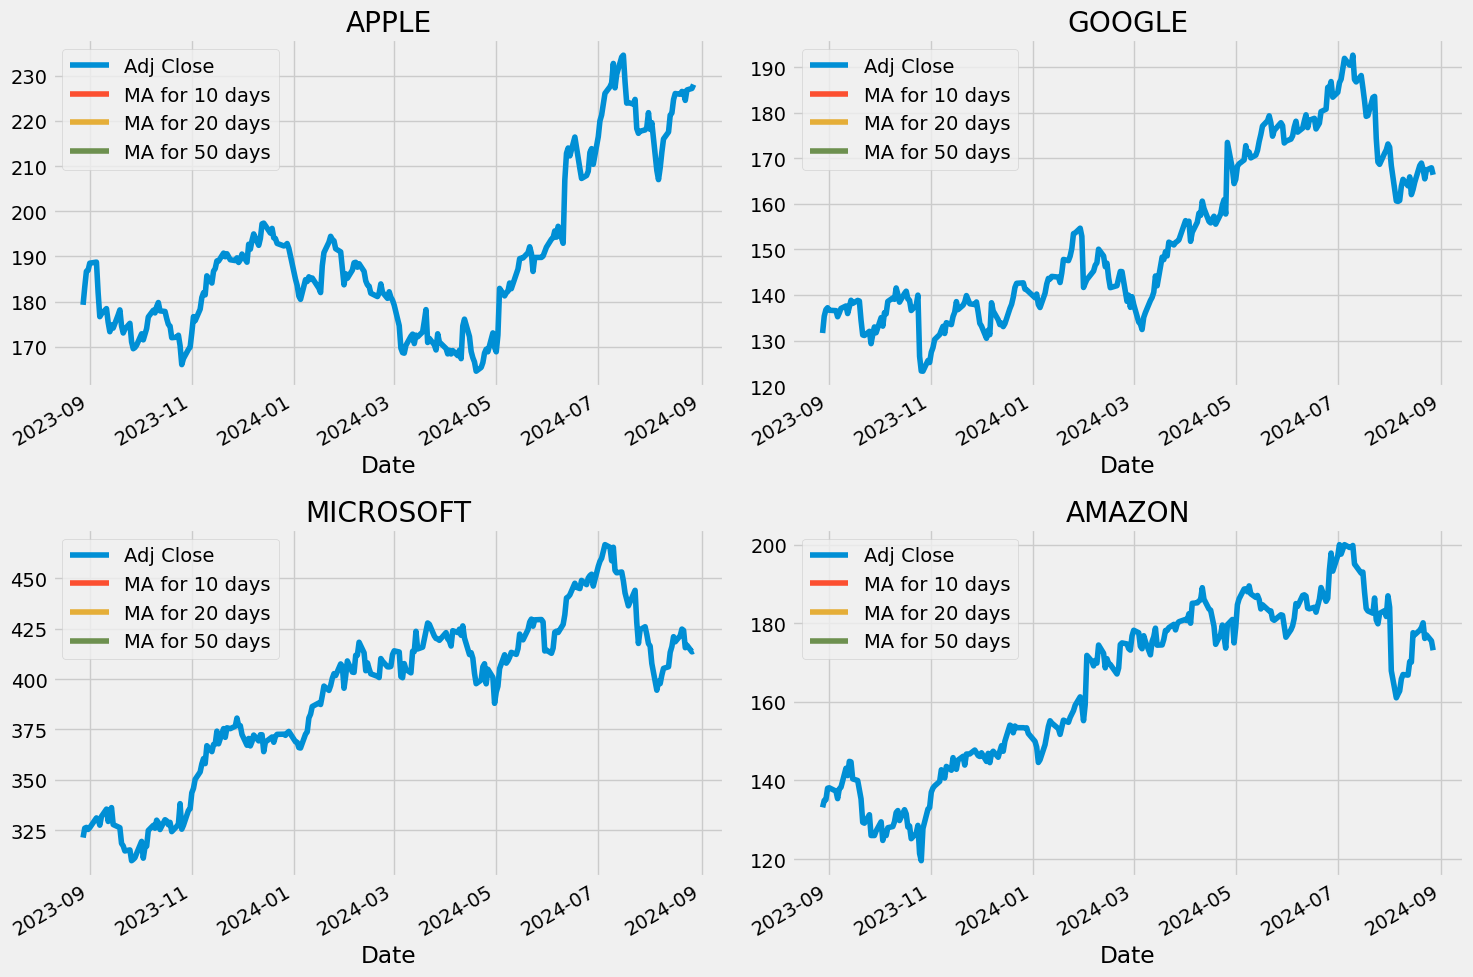

In [6]:
import matplotlib.pyplot as plt

# Moving averages
ma_day = [10, 20, 50]

# Calculating the moving averages within the multi-indexed DataFrame
for ma in ma_day:
    for tech_label in tech_list:
        df.loc[tech_label, f'MA for {ma} days'] = df.xs(tech_label)['Adj Close'].rolling(ma).mean()

# Plotting the moving averages
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot for each company
for i, tech_label in enumerate(tech_list):
    company_data = df.xs(tech_label)
    company_data[['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{company_name[i]}')

fig.tight_layout()
plt.show()


3. What was the daily return of the stock on average?

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


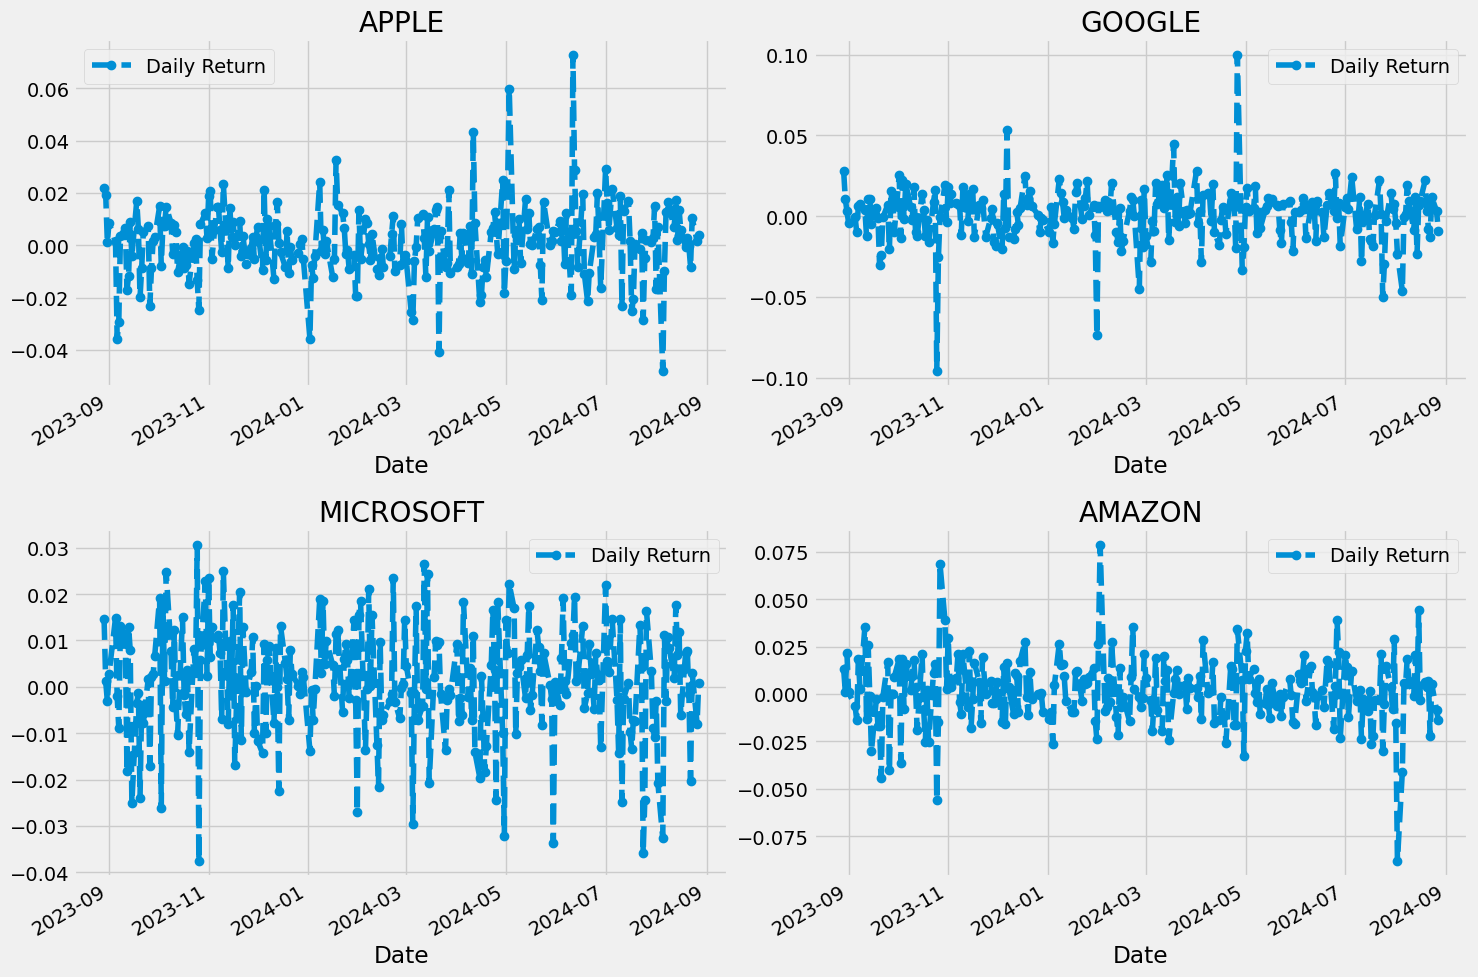

In [7]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# Define the tech stocks and date range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)  # Last one year

# Fetching the data and calculating daily returns
company_list = []
for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    data['Daily Return'] = data['Adj Close'].pct_change()  # Calculate daily returns
    company_list.append(data)

# Plotting the daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list):
    ax = axes[i//2, i%2]
    company['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(f'{company_name[i]}')

fig.tight_layout()
plt.show()


In [8]:
import yfinance as yf
from datetime import datetime
import pandas as pd

# Define the tech stocks and date range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)  # Last one year

# Fetching the data
company_list = []
for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    data['company_name'] = stock
    company_list.append(data)

# Combine all the dataframes into a single dataframe with MultiIndex
df = pd.concat(company_list, keys=tech_list)

# Debug: Check the retrieved data
for tech_label in tech_list:
    print(f"\n{tech_label} Data Head:")
    print(df.xs(tech_label).head())

# Check for NaNs or any unexpected data issues
for tech_label in tech_list:
    print(f"\n{tech_label} Data Tail:")
    print(df.xs(tech_label).tail())



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL Data Head:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-28  180.089996  180.589996  178.550003  180.190002  179.272659   
2023-08-29  179.699997  184.899994  179.500000  184.119995  183.182632   
2023-08-30  184.940002  187.850006  184.740005  187.649994  186.694672   
2023-08-31  187.839996  189.119995  187.479996  187.869995  186.913544   
2023-09-01  189.490005  189.919998  188.279999  189.460007  188.495438   

              Volume company_name  
Date                               
2023-08-28  43820700         AAPL  
2023-08-29  53003900         AAPL  
2023-08-30  60813900         AAPL  
2023-08-31  60794500         AAPL  
2023-09-01  45732600         AAPL  

GOOG Data Head:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-28  132.080002  133.240005  130.850006 

In [9]:
# Calculate the daily return for each company in the multi-indexed DataFrame
for tech_label in tech_list:
    df.loc[tech_label, 'Daily Return'] = df.xs(tech_label)['Adj Close'].pct_change().dropna()

# Debug: Check the daily return data after recalculating
for tech_label in tech_list:
    print(f"\n{tech_label} Daily Return:")
    print(df.xs(tech_label)['Daily Return'].head())



AAPL Daily Return:
Date
2023-08-28   NaN
2023-08-29   NaN
2023-08-30   NaN
2023-08-31   NaN
2023-09-01   NaN
Name: Daily Return, dtype: float64

GOOG Daily Return:
Date
2023-08-28   NaN
2023-08-29   NaN
2023-08-30   NaN
2023-08-31   NaN
2023-09-01   NaN
Name: Daily Return, dtype: float64

MSFT Daily Return:
Date
2023-08-28   NaN
2023-08-29   NaN
2023-08-30   NaN
2023-08-31   NaN
2023-09-01   NaN
Name: Daily Return, dtype: float64

AMZN Daily Return:
Date
2023-08-28   NaN
2023-08-29   NaN
2023-08-30   NaN
2023-08-31   NaN
2023-09-01   NaN
Name: Daily Return, dtype: float64


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


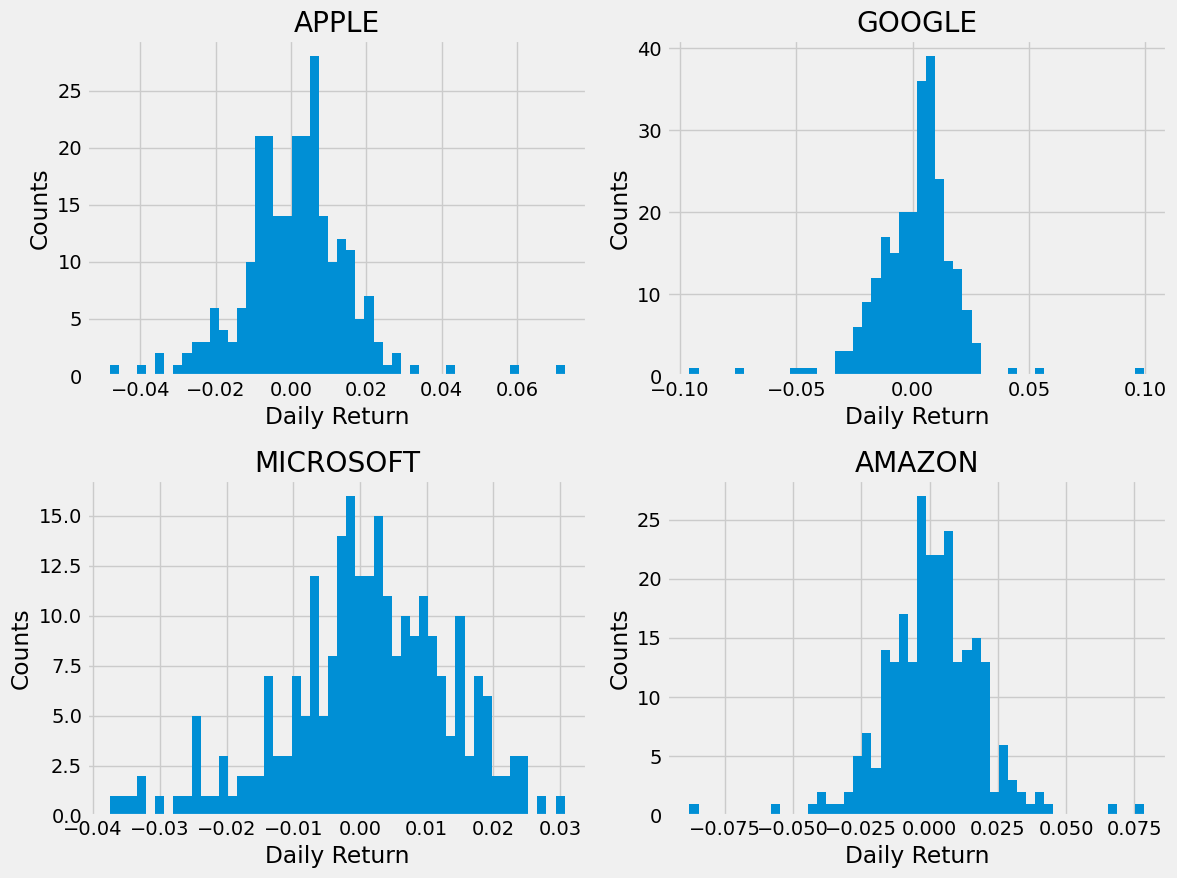

In [10]:


# Define the tech stocks and date range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)  # Last one year

# Fetching the data and calculating daily returns
company_list = []
for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    data['Daily Return'] = data['Adj Close'].pct_change()  # Calculate daily returns
    company_list.append(data)

# Plotting the daily returns histograms
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].dropna().hist(bins=50)  # Drop NaN values before plotting
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()
plt.show()


4. What was the correlation between different stocks closing prices?

In [11]:
import pandas_datareader.data as pdr


#tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)  # Last one year

# Fetching the data using yfinance
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
print(tech_rets.head())


[*********************100%***********************]  4 of 4 completed


Ticker                         AAPL      AMZN      GOOG      MSFT
Date                                                             
2023-08-28 00:00:00+00:00       NaN       NaN       NaN       NaN
2023-08-29 00:00:00+00:00  0.021810  0.013294  0.028075  0.014550
2023-08-30 00:00:00+00:00  0.019172  0.001186  0.010628  0.001157
2023-08-31 00:00:00+00:00  0.001172  0.021766  0.003067 -0.003133
2023-09-01 00:00:00+00:00  0.008463  0.000797 -0.004004  0.002746


[*********************100%***********************]  4 of 4 completed


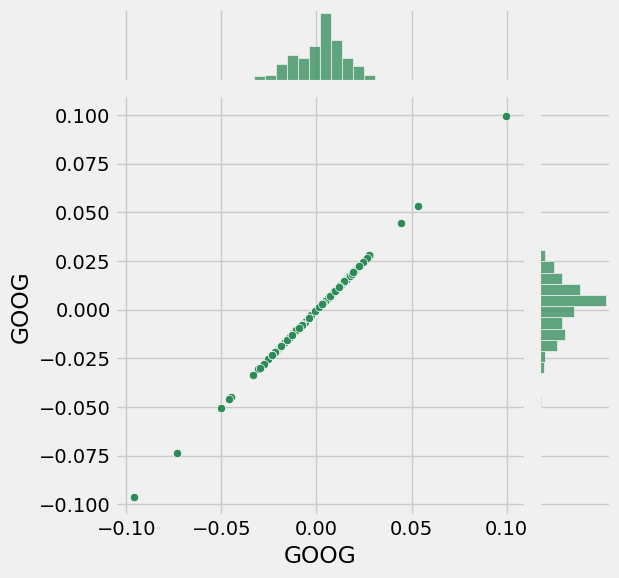

In [28]:


# Define the tech stocks and date range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)  # Last one year

# Fetching the data using yfinance
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

plt.show()  # Show the plot


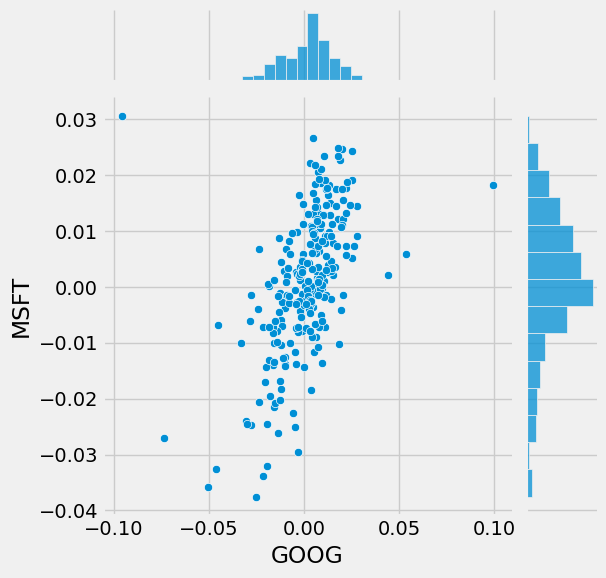

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

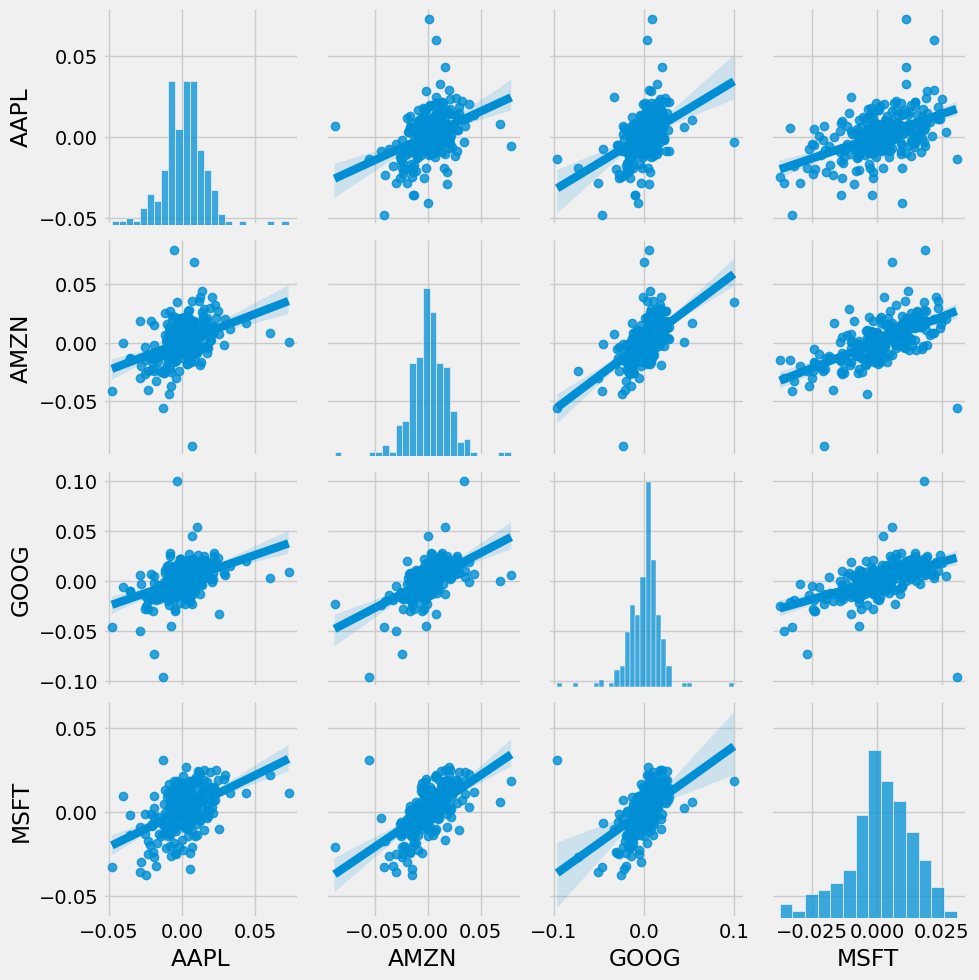

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

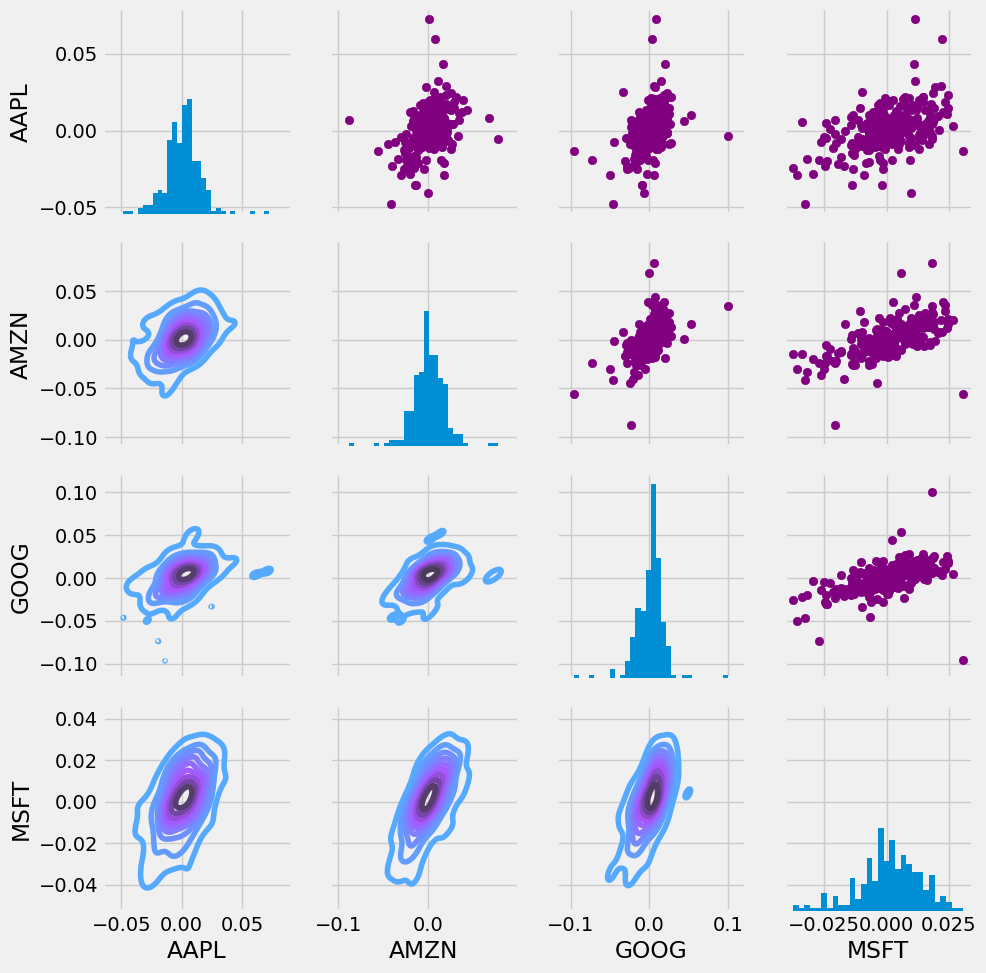

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

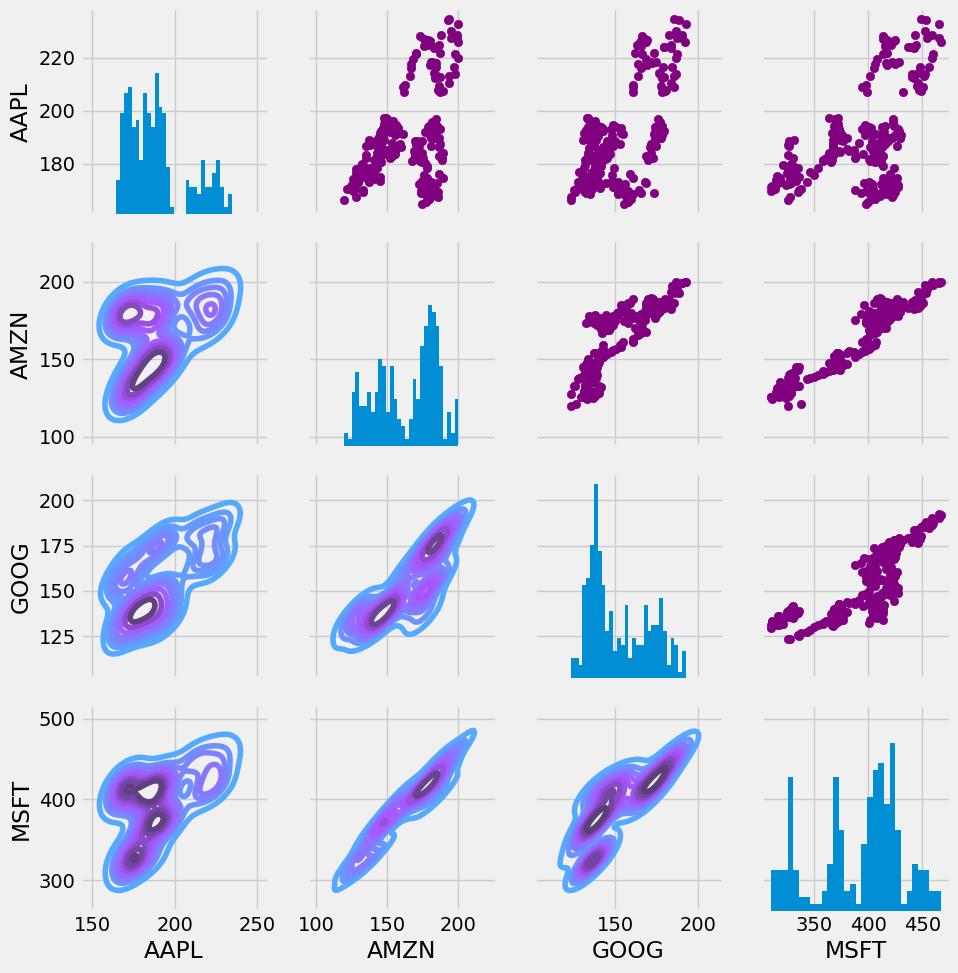

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

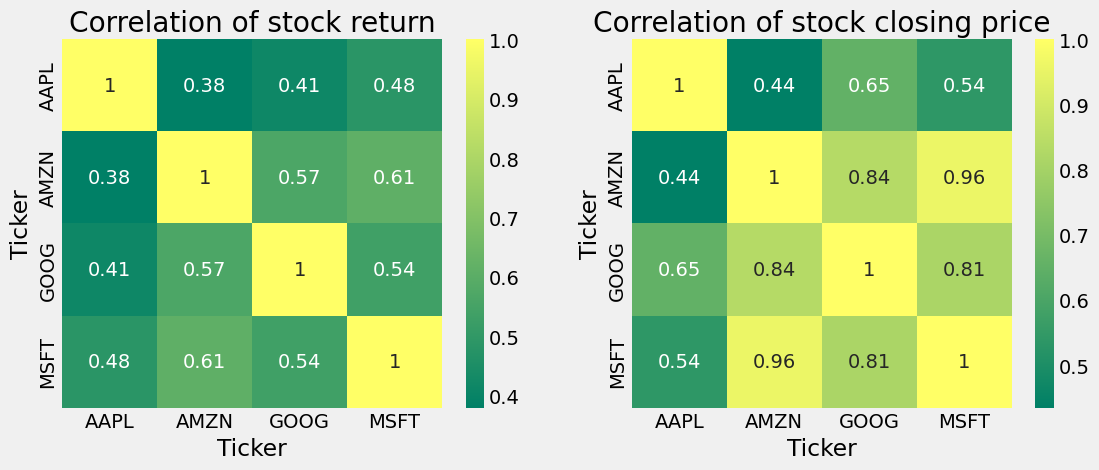

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

5. How much value do we put at risk by investing in a particular stock?

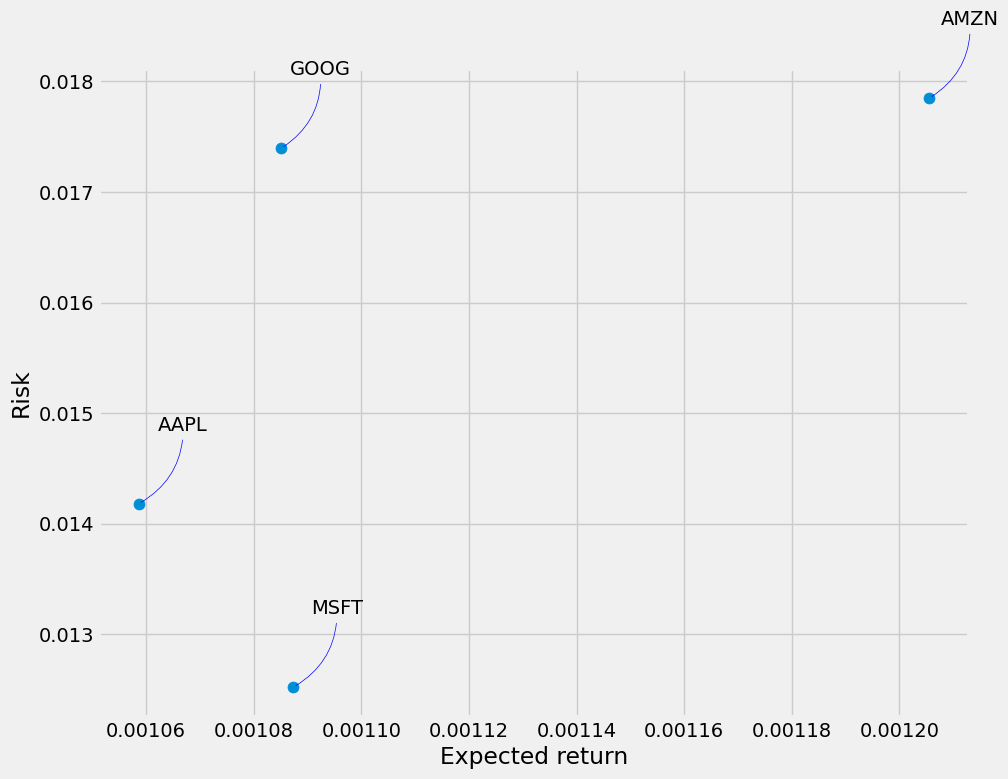

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

6. Predicting the closing price stock price of APPLE inc

In [19]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show the data
print(df)


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.402627   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.469282   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.607712   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.739512   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.719311   
...                ...         ...         ...         ...         ...   
2024-08-21  226.520004  227.979996  225.050003  226.399994  226.399994   
2024-08-22  227.789993  228.339996  223.899994  224.529999  224.529999   
2024-08-23  225.660004  228.220001  224.330002  226.839996  226.839996   
2024-08-26  226.759995  227.279999  223.889999  227.179993  227.179993   
2024-08-27  226.000000  228.850006  224.889999  228.029999  228.029999   

               Volume  
Date         

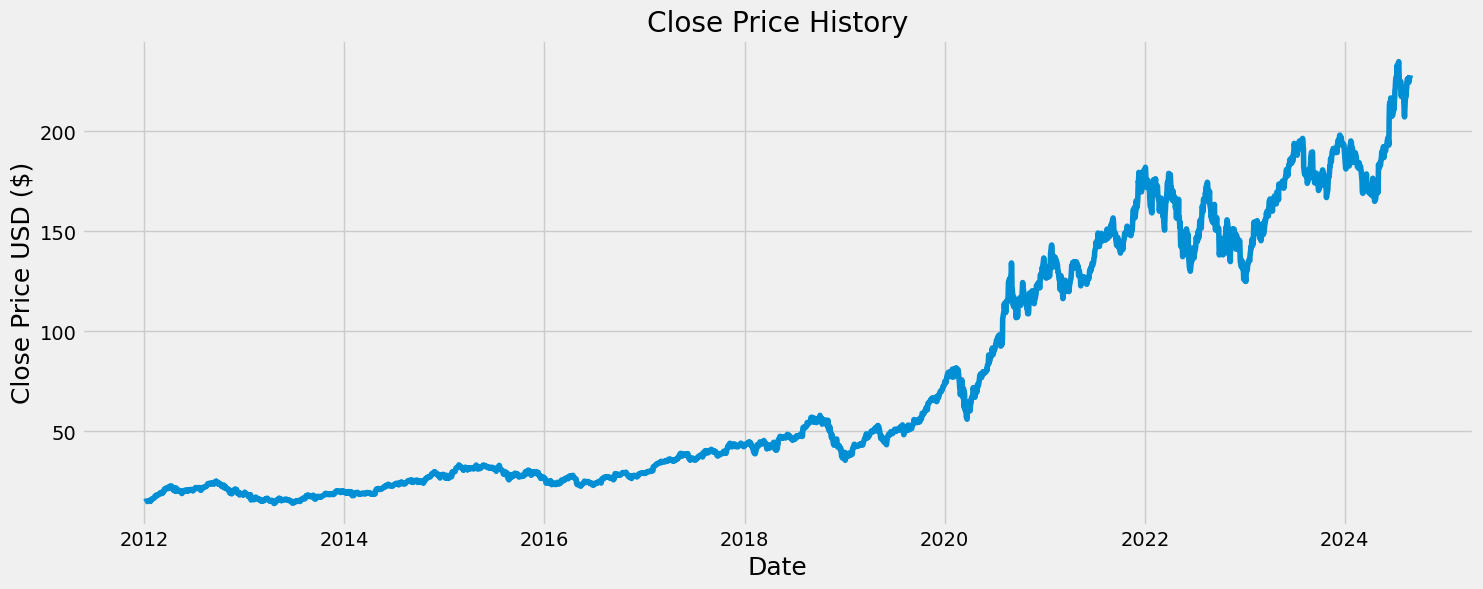

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3024

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.96387051],
       [0.96540984],
       [0.96925824]])

In [23]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

7.Build LSTM model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\CA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2964/2964 ━━━━━━━━━━━━━━━━━━━━ 138s 44ms/step - loss: 0.0013


In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step


7.377539087005248

C:\Users\CA\AppData\Local\Temp\ipykernel_15308\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


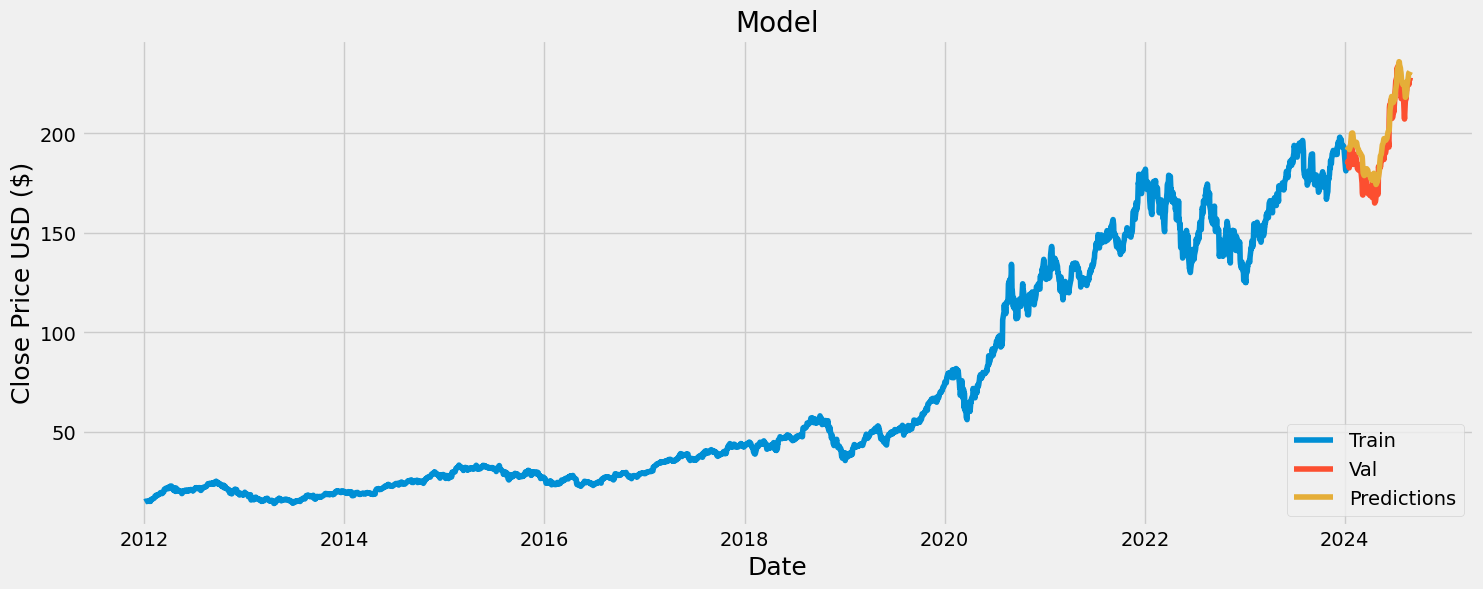

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-01-10,186.190002,191.608231
2024-01-11,185.589996,191.961319
2024-01-12,185.919998,192.297836
2024-01-16,183.630005,192.624466
2024-01-17,182.679993,192.417374
...,...,...
2024-08-21,226.399994,229.814240
2024-08-22,224.529999,230.463013
2024-08-23,226.839996,230.472763
